# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [2]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [3]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


Вычисленные коэффициенты w и b:

In [4]:
#add bias term
all_ones = np.ones((X_train.shape[0], 1))
X_ = np.hstack((all_ones, X_train))

coef = ((np.linalg.inv(X_.T.dot(X_))).dot(X_.T)).dot(y_train)
w = coef[1:]
b = coef[0]

print('Manulal coef w, b:', w, b)

Manulal coef w, b: [9.7191717] -7.21935712276987


Найденные коэффициенты из sklearn:

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()

model.fit(X_train, y_train) # обучение модели

w_sclearn = model.coef_
b_sclearn = model.intercept_

print('Sclearn coef w, b:', w_sclearn, b_sclearn)

Sclearn coef w, b: [9.7191717] -7.219357122769867


Поиск значений MAE и MSE:

In [7]:
y_train_predicted = X_train@w + b
y_test_predicted = X_test@w + b
n = len(y_train_predicted)

MAE_train = np.sum(np.abs(y_train - y_train_predicted)) / n
MAE_test = np.sum(np.abs(y_test - y_test_predicted)) / n

print('Manual Train MAE: ', MAE_train)
print('Manual Test MAE: ', MAE_test)

Manual Train MAE:  7.405046363696088
Manual Test MAE:  7.50369331801387


In [8]:
MSE_train = np.sum((y_train - y_train_predicted) ** 2) / n
MSE_test = np.sum((y_test - y_test_predicted) ** 2) / n

print('Manual Train MSE: ', MSE_train)
print('Manual Test MSE: ', MSE_test)

Manual Train MSE:  72.96212966172567
Manual Test MSE:  91.49968431603425


Поиск значений MAE и MSE для sklearn:

In [9]:
from sklearn.metrics import mean_absolute_error
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

MAE_train_sklearn = mean_absolute_error(y_train, y_train_predicted)
MAE_test_sklearn = mean_absolute_error(y_test, y_test_predicted)

print('Sklearn Train MAE: ', MAE_train_sklearn)
print('Sklearn Test MAE: ', MAE_test_sklearn)

Sklearn Train MAE:  7.40504636369609
Sklearn Test MAE:  7.503693318013867


In [10]:
from sklearn.metrics import mean_squared_error

MSE_train_sklearn = mean_squared_error(y_train, y_train_predicted)
MSE_test_sklearn = mean_squared_error(y_test, y_test_predicted)

print('Sklearn Train MSE: ', MSE_train_sklearn)
print('Sklearn Test MSE: ', MSE_test_sklearn)

Sklearn Train MSE:  72.96212966172568
Sklearn Test MSE:  91.49968431603423


Сравним значения:

In [11]:
print("Best results:")

if MAE_train > MAE_train_sklearn:
  print('1. MAE_train_sklearn')
else:
  print ('1. MAE_train')

if MAE_test > MAE_test_sklearn:
  print('2. MAE_test_sklearn')
else:
  print ('2. MAE_test')

if MSE_train > MSE_train_sklearn:
  print('3. MSE_train_sklearn')
else:
  print ('3. MSE_train')

if MSE_test > MSE_test_sklearn:
  print('4. MSE_test_sklearn')
else:
  print ('4. MSE_test')

Best results:
1. MAE_train
2.  MAE_test_sklearn
3. MSE_train
4. MSE_test_sklearn


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [12]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [13]:
X_train = data['x_train'].reshape(-1, 1)
y_train = data['y_train']

#add bias term
all_ones = np.ones((X_train.shape[0], 1))
X_ = np.hstack((all_ones, X_train))

coef = ((np.linalg.inv(X_.T.dot(X_))).dot(X_.T)).dot(y_train)
w = coef[1:]
b = coef[0]

print('Manulal coef w, b:', w, b)

Manulal coef w, b: [-0.3479183] 2.06518197296931


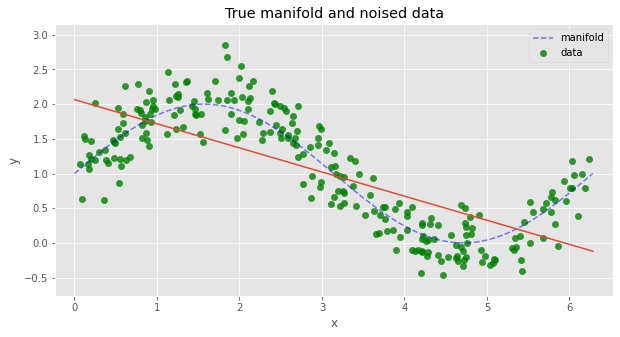

In [14]:
plt.figure(figsize=(10, 5))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data['support'], data['support'].reshape(-1, 1).dot(w) + b, label='predicted')
plt.show()

In [15]:
y_train_predicted = X_train@w + b
n = len(y_train_predicted)

MAE_train = np.sum(np.abs(y_train - y_train_predicted)) / n
MSE_train = np.sum((y_train - y_train_predicted) ** 2) / n

print('Manual Train MAE: ', MAE_train)
print('Manual Train MSE: ', MSE_train)

Manual Train MAE:  0.4664540300502302
Manual Train MSE:  0.303773912801306


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

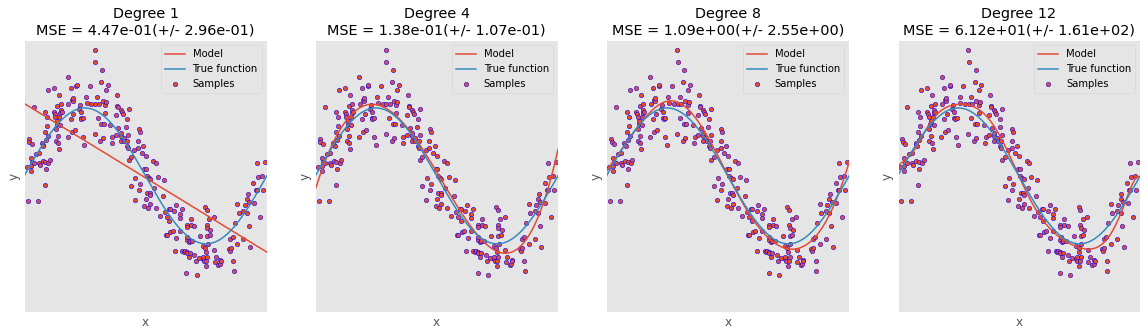

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

X = data['x_train']
y = data['y_train']

degrees = [1, 4, 8, 12]
plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks=(), yticks=())

  polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
  pipeline.fit(X[:, np.newaxis], y)

  # Evaluate the models using crossvalidation
  scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
  X_test = np.linspace(0, 2*np.pi, 100)
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
  plt.plot(data['support'], data['values'], label="True function")
  plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0, 2*np.pi))
  plt.ylim((-1, 3))
  plt.legend(loc="best")
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

Наиболее подходящим полиномом является полином ~8 степени (обладает наименьшей среднеквадратичной ошибкой (с учетом погрешности)). На полиномах младших степеней (из рассмотренных: степени 1 и 4) модель недообучена, а на полиномах старших степеней (из рассмотренных: степень 10) модель переобучена.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [17]:
from sklearn.datasets import load_boston


In [18]:
house_data = load_boston()

## Задание 3.4

Найдем наиболее значимые признаки:

In [19]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#выполним нормировку
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [22]:
feature_importance = pd.DataFrame({'Название признака': X.columns, 'Важность признака': np.abs(model.coef_)})
most_important = feature_importance.sort_values(by='Важность признака', ascending=False)['Название признака'].head(7).to_list()

print('Most important features:', most_important)

Most important features: ['LSTAT', 'RAD', 'DIS', 'TAX', 'NOX', 'RM', 'PTRATIO']


Найдем метрики качества для полного датасета:

In [23]:
mse_train_full = mean_squared_error(y_train, y_train_prediction)
mse_test_full = mean_squared_error(y_test, y_test_prediction)

mae_train_full = mean_absolute_error(y_train, y_train_prediction)
mae_test_full = mean_absolute_error(y_test, y_test_prediction)

print('Train MSE: ', mse_train_full)
print('Test MSE: ', mse_test_full)

print('Train MAE: ', mae_train_full)
print('Test MAE: ', mae_test_full)

Train MSE:  22.553771067733113
Test MSE:  22.70203074992162
Train MAE:  3.285280297525134
Test MAE:  3.4501635622785614


Найдем параметры линейной регрессии и метрики качества для усеченного датасета:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X[most_important], y, train_size=0.7)

#выполним нормировку
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [25]:
mse_train_part = mean_squared_error(y_train, y_train_prediction)
mse_test_part = mean_squared_error(y_test, y_test_prediction)

mae_train_part = mean_absolute_error(y_train, y_train_prediction)
mae_test_part = mean_absolute_error(y_test, y_test_prediction)

print('Train MSE: ', mse_train_part)
print('Test MSE: ', mse_test_part)

print('Train MAE: ', mae_train_part)
print('Test MAE: ', mae_test_part)

Train MSE:  23.31172839542086
Test MSE:  26.20340860303067
Train MAE:  3.464721814050603
Test MAE:  3.656648607010253


Сравним результаты на полной и усеченной выборках:

In [26]:
print("Best results:")

if mae_train_full > mae_train_part:
  print('1. MAE_train_part')
else:
  print ('1. MAE_train_full')

if mae_test_full > mae_test_part:
  print('2. MAE_test_part')
else:
  print ('2. MAE_test_full')

if mse_train_full >mse_train_part:
  print('3. MSE_train_part')
else:
  print ('3. MSE_train_full')

if mse_test_full > mse_test_part:
  print('4. MSE_test_part')
else:
  print ('4. MSE_test_full')

Best results:
1. MAE_train_full
2. MAE_test_full
3. MSE_train_full
4. MSE_test_full
